In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

import ssl
!pip install keras_tuner
import keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


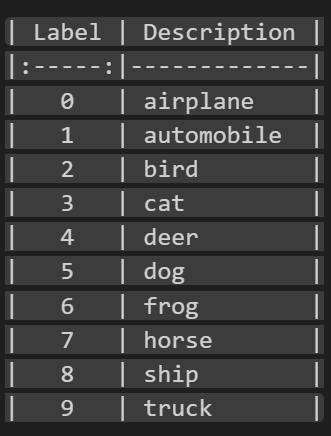

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

The above cell normalizes the data so that it can be represented as a fraction of 255.

In [ ]:
MLPmodel = keras.models.Sequential()
MLPmodel.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
MLPmodel.add(keras.layers.Dense(300, activation="relu"))
MLPmodel.add(keras.layers.Dense(200, activation="relu"))
MLPmodel.add(keras.layers.Dense(100, activation="relu"))
MLPmodel.add(keras.layers.Dense(50, activation="relu"))
MLPmodel.add(keras.layers.Dense(10, activation="softmax"))
MLPmodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         921,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,007,760 (3.84 MB)

 Trainable params: 1,007,760 (3.84 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
MLPmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
MLPhistory = MLPmodel.fit(x_train, y_train, epochs=10, validation_split = .1,
                          batch_size = 64)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.2433 - loss: 2.0418 - val_accuracy: 0.3380 - val_loss: 1.8063
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3623 - loss: 1.7545 - val_accuracy: 0.3912 - val_loss: 1.6692
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4089 - loss: 1.6483 - val_accuracy: 0.3974 - val_loss: 1.6628
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4391 - loss: 1.5736 - val_accuracy: 0.4142 - val_loss: 1.6137
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4490 - loss: 1.5343 - val_accuracy: 0.4488 - val_loss: 1.5466
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4603 - loss: 1.5030 - val_accuracy: 0.4590 - val_loss: 1.5031
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4788 - loss: 1.4627 - val_accuracy: 0.4664 - val_loss: 1.5016
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4897 - loss: 1.4309 - val_accuracy: 0

In [ ]:
MLPmodel.evaluate(x_test, y_test, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4834 - loss: 1.4623


{'accuracy': 0.48019999265670776, 'loss': 1.4674791097640991}

This was my first attempt to create the model, with accuracy of 48.02% and a loss of 1.467s


*   Attempt 1: 2 RELU Layers, ADAM Optimizer, Metrics: accuracy: 0.
4763999879360199, loss: 1.468599557876587



In [ ]:
def buildMLPModel(hp):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
  for i in range(hp.Int('num_layers', 2, 10)):
    model.add(keras.layers.Dense(hp.Int('units_' + str(i), 50, 300),
                                 activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))
  model.compile(optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
  return model
tuner = keras_tuner.RandomSearch(
    buildMLPModel,
    objective='val_loss',
    max_trials=100)
tuner.search(x_train, y_train, epochs=10, validation_split=0.1)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

Trial 100 Complete [00h 00m 51s]
val_loss: 1.9157522916793823

Best val_loss So Far: 1.3949477672576904
Total elapsed time: 01h 46m 20s


{'num_layers': 2,
 'units_0': 260,
 'units_1': 281,
 'learning_rate': 0.0001,
 'units_2': 91,
 'units_3': 198,
 'units_4': 251,
 'units_5': 142,
 'units_6': 70,
 'units_7': 201,
 'units_8': 149,
 'units_9': 237}

This was my hyperparameter tuning, I ran 100 trials of the training to get the best possible model based on number of hidden layers, the number of nodes in each layer, the learning rate. This returned the best possible model based on the validation loss of the model.

In [ ]:
improvedMLP  = buildMLPModel(best_hps)
improvedMLP.summary()
improvedMLP.compile(optimizer=keras.optimizers.Adam(0.0001),
                    loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
improvedMLPhistory = improvedMLP.fit(x_train, y_train, epochs=10,
                                     validation_split = .1, batch_size = 64)
improvedMLP.evaluate(x_test, y_test, return_dict=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 260)                 │         798,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 281)                 │          73,341 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,820 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875,141 (3.34 MB)

 Trainable params: 875,141 (3.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2878 - loss: 1.9859 - val_accuracy: 0.3758 - val_loss: 1.7527
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3944 - loss: 1.7184 - val_accuracy: 0.4108 - val_loss: 1.6835
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4302 - loss: 1.6263 - val_accuracy: 0.4306 - val_loss: 1.6054
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4489 - loss: 1.5603 - val_accuracy: 0.4336 - val_loss: 1.6071
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4638 - loss: 1.5181 - val_accuracy: 0.4438 - val_loss: 1.5758
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4760 - loss: 1.4862 - val_accuracy: 0.4702 - val_loss: 1.4921
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4931 - loss: 1.4487 - val_accuracy: 0.4718 - val_loss: 1.5078
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4995 - loss: 1.4204 - val_accuracy: 0.

{'accuracy': 0.4860999882221222, 'loss': 1.4499258995056152}

The best results I have been able to get have been to use 2 layers, 260 nodes in the first hidden layer, then 281 nodes in a second hidden layer. I have only been able to get to 49% accuracy with the MLP model. To improve the model with more time, I could consider using a different activation function, or having the tuner target validation accuracy instead of minimizing validation loss.

In [ ]:
CNNmodel = keras.models.Sequential()
CNNmodel.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
CNNmodel.add(keras.layers.MaxPooling2D((2,2)))
CNNmodel.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
CNNmodel.add(keras.layers.MaxPooling2D((2,2)))
CNNmodel.add(keras.layers.Flatten())
CNNmodel.add(keras.layers.Dense(128, activation='relu'))
CNNmodel.add(keras.layers.Dense(10, activation='softmax'))
CNNmodel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNNmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
CNNhistory = CNNmodel.fit(x_train, y_train, epochs=10, validation_split = .1, batch_size = 64)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3728 - loss: 1.7350 - val_accuracy: 0.5368 - val_loss: 1.2924
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5857 - loss: 1.1792 - val_accuracy: 0.6372 - val_loss: 1.0488
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6450 - loss: 1.0167 - val_accuracy: 0.6630 - val_loss: 0.9675
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6836 - loss: 0.9039 - val_accuracy: 0.6788 - val_loss: 0.9444
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7085 - loss: 0.8315 - val_accuracy: 0.7014 - val_loss: 0.9029
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7355 - loss: 0.7629 - val_accuracy: 0.7046 - val_loss: 0.8767
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7562 - loss: 0.7021 - val_accuracy: 0.7200 - val_loss: 0.8522
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7787 - loss: 0.6368 - val_accuracy: 0.

In [ ]:
CNNmodel.evaluate(x_test, y_test, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6945 - loss: 0.9514


{'accuracy': 0.6952000260353088, 'loss': 0.9552889466285706}

This was my first attempt at creating the CNN model. I found that the accuracy was much higher and the loss much lower than the MLP model. This ended up being my best CNN model.

In [ ]:
def buildCNNModel(hp):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hp.Int('conv_filters_1', 32, 128, step=32),
                                   kernel_size=(3, 3),
                                   activation='relu',
                                   input_shape=[32, 32, 3]))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    for i in range(hp.Int('num_conv_layers', 1, 5)):
        model.add(keras.layers.Conv2D(filters=hp.Int('conv_filters_' + str(i + 2), 32, 128, 32),
                                       kernel_size=(3, 3),
                                       activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(keras.layers.Flatten())

    for i in range(hp.Int('num_dense_layers', 1, 2)):
        model.add(keras.layers.Dense(hp.Int('units_' + str(i), 50, 300), activation='relu'))

    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

tunerCNN = keras_tuner.RandomSearch(
    buildCNNModel,
    objective='val_loss',
    #I changed the max trials to only 5 because I ran out of gpu runtime
    max_trials=5
)

tunerCNN.search(x_train, y_train, epochs=10, validation_split=0.1)
best_hps = tunerCNN.get_best_hyperparameters(num_trials=1)[0]
best_hps.values


Trial 5 Complete [00h 13m 34s]
val_loss: 0.907422661781311

Best val_loss So Far: 0.907422661781311
Total elapsed time: 00h 59m 19s


{'conv_filters_1': 64,
 'num_conv_layers': 2,
 'conv_filters_2': 32,
 'num_dense_layers': 5,
 'units_0': 195,
 'learning_rate': 0.001,
 'conv_filters_3': 64,
 'conv_filters_4': 128,
 'units_1': 202,
 'units_2': 250,
 'units_3': 109,
 'units_4': 114}

In [ ]:
improvedCNN  = buildCNNModel(best_hps)
improvedCNN.summary()
improvedCNN.compile(optimizer=keras.optimizers.Adam(0.001),
                    loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
improvedCNNhistory = improvedCNN.fit(x_train, y_train, epochs=10,
                                     validation_split = .1, batch_size = 64)
improvedCNN.evaluate(x_test, y_test, return_dict=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 195)                 │          50,115 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 202)                 │          39,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 250)                 │          50,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 109)                 │          27,359 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 114)                 │          12,540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,258 (860.38 KB)

 Trainable params: 220,258 (860.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.2544 - loss: 1.9461 - val_accuracy: 0.4840 - val_loss: 1.3991
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 77s 109ms/step - accuracy: 0.5004 - loss: 1.3678 - val_accuracy: 0.5518 - val_loss: 1.2451
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 105ms/step - accuracy: 0.5707 - loss: 1.1947 - val_accuracy: 0.5986 - val_loss: 1.1510
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.6112 - loss: 1.0903 - val_accuracy: 0.6374 - val_loss: 1.0213
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.6463 - loss: 0.9991 - val_accuracy: 0.6318 - val_loss: 1.0740
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.6691 - loss: 0.9243 - val_accuracy: 0.6638 - val_loss: 0.9880
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.6971 - loss: 0.8571 - val_accuracy: 0.6650 - val_loss: 0.9557
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.7114 - loss: 0

{'accuracy': 0.6751000285148621, 'loss': 0.9554824233055115}

The results from attempting to use the keras tuner on the CNN model did not produce better results than the first model I built. However the accuracy of that first model was much better than the MLP model.

In [ ]:
CNNmodelManualHP = keras.models.Sequential()
CNNmodelManualHP.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
CNNmodelManualHP.add(keras.layers.MaxPooling2D((2,2)))
CNNmodelManualHP.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
CNNmodelManualHP.add(keras.layers.MaxPooling2D((2,2)))
CNNmodelManualHP.add(keras.layers.Flatten())
CNNmodelManualHP.add(keras.layers.Dense(128, activation='relu'))
CNNmodelManualHP.add(keras.layers.Dropout(0.5))
CNNmodelManualHP.add(keras.layers.Dense(64, activation='relu'))
CNNmodelManualHP.add(keras.layers.Dropout(0.5))
CNNmodelManualHP.add(keras.layers.Dense(32, activation='relu'))
CNNmodelManualHP.add(keras.layers.Dropout(0.5))
CNNmodelManualHP.add(keras.layers.Dense(10, activation='softmax'))
CNNmodelManualHP.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 325,098 (1.24 MB)

 Trainable params: 325,098 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
CNNmodelManualHP.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
CNNmodelManualHPhistory = CNNmodelManualHP.fit(x_train, y_train, epochs=10, validation_split = .1, batch_size = 64)
CNNmodelManualHP.evaluate(x_test, y_test, return_dict=True)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 64s 88ms/step - accuracy: 0.1549 - loss: 2.1864 - val_accuracy: 0.3568 - val_loss: 1.6960
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 78s 83ms/step - accuracy: 0.2956 - loss: 1.7931 - val_accuracy: 0.4438 - val_loss: 1.5065
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.3706 - loss: 1.6575 - val_accuracy: 0.4912 - val_loss: 1.4083
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.4350 - loss: 1.5269 - val_accuracy: 0.5486 - val_loss: 1.2605
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.4774 - loss: 1.4423 - val_accuracy: 0.5826 - val_loss: 1.2096
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.5114 - loss: 1.3822 - val_accuracy: 0.5940 - val_loss: 1.1659
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 82ms/step - accuracy: 0.5319 - loss: 1.3314 - val_accuracy: 0.6136 - val_loss: 1.1409
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.5532 - loss: 1.2693 - 

{'accuracy': 0.6176999807357788, 'loss': 1.110916018486023}

I added dropout layers, but they did not increase the accuracy at all.

Overall, the CNN model outperformed the MLP model, but neither model performed all that well. I think with more time and more GPU space, I would change the hyperparameters. The models did not ever reach high accuracy in the history, stage however, when I tried to add more layers that did not improve the accuracy either. I think I would probably change the activation function.

In [ ]:


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(244, 244, 1)  # Grayscale, channels_last
))

# Add more layers
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))  # Downsample by 2
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten())  # Flatten into a 1D vector

# Fully connected layers
model.add(keras.layers.Dense(128, activation='relu'))  # Hidden dense layer
model.add(keras.layers.Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
